In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('/content/train.csv')

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
# Shape -> (Row, Col)
df.shape

(891, 12)

In [69]:
# Info -> Non-null + Data Count + Data Type Variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
# Missing Value Percentage
df.isnull().sum()/df.shape[0]*100

# Hasil Analisis:
# Age -> 19.87%
# Cabin -> 77.10%
# Embarked -> 0.22%

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [71]:
# finding duplicates
df.duplicated().sum()

np.int64(0)

In [72]:
df.describe().T

# Count, Unique, Top, Frequency dari Data Object
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


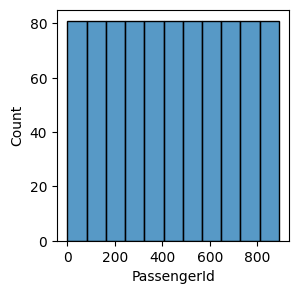

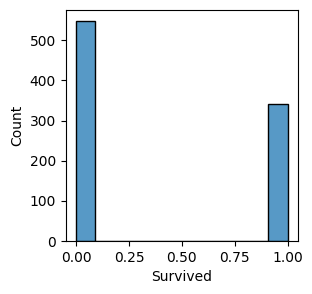

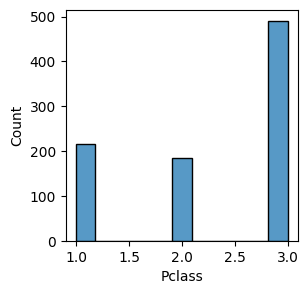

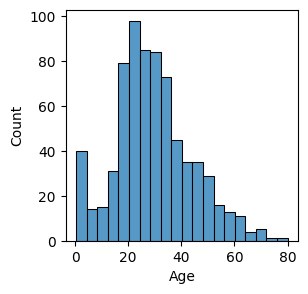

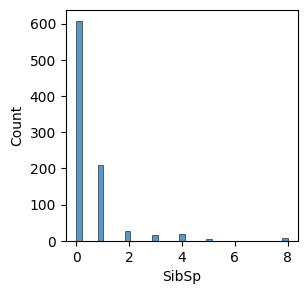

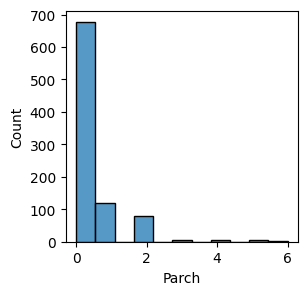

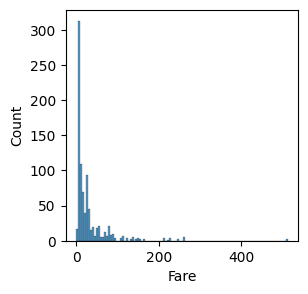

In [73]:
for i in df.select_dtypes(include="number").columns:
	plt.figure(figsize=(3,3))
	sns.histplot(data=df, x=i)
	plt.show()

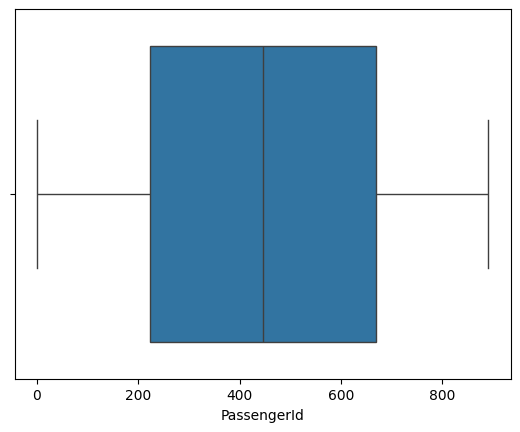

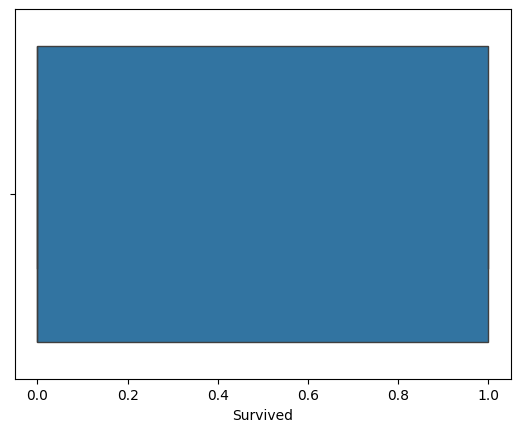

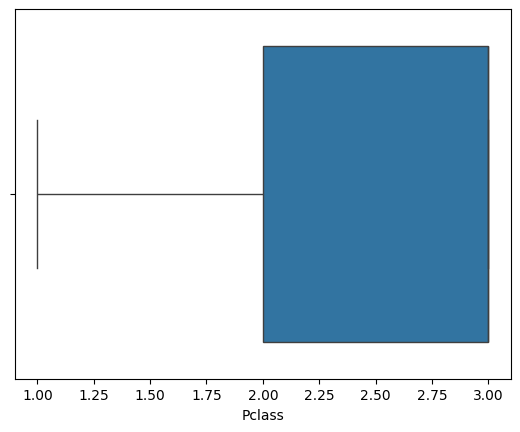

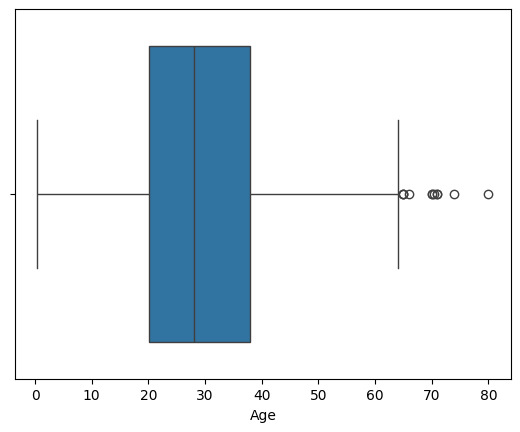

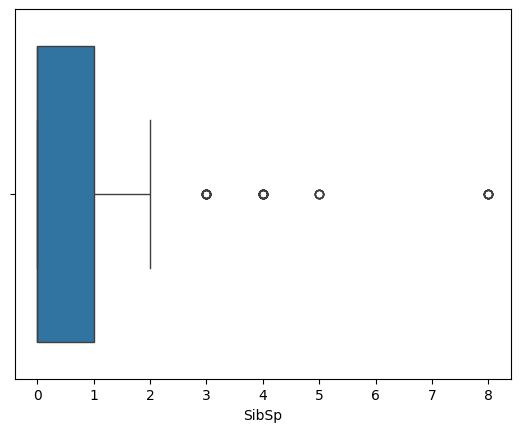

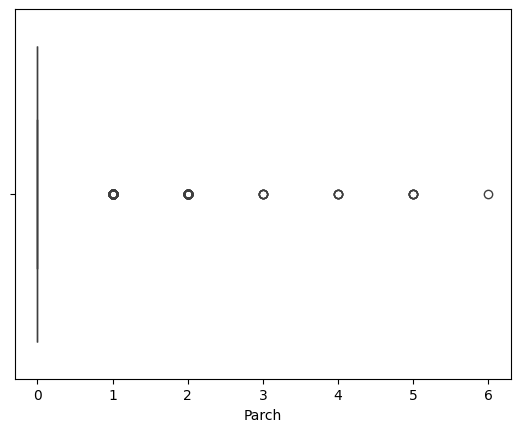

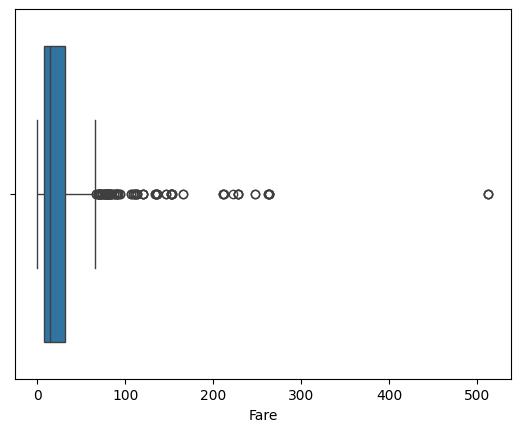

In [74]:
for i in df.select_dtypes(include="number").columns:
	sns.boxplot(data=df, x=i)
	plt.show()

	# Age (Umur): Distribusinya cukup normal
	# Fare (Tarif): Masalah: Sangat skewed (miring) ke kanan
	# SibSp & Parch (Keluarga):Mayoritas nilainya adalah 0 (Ga ada yang aneh)
	# PassengerId: Ga ada yang aneh karena naiknya terus

<Axes: >

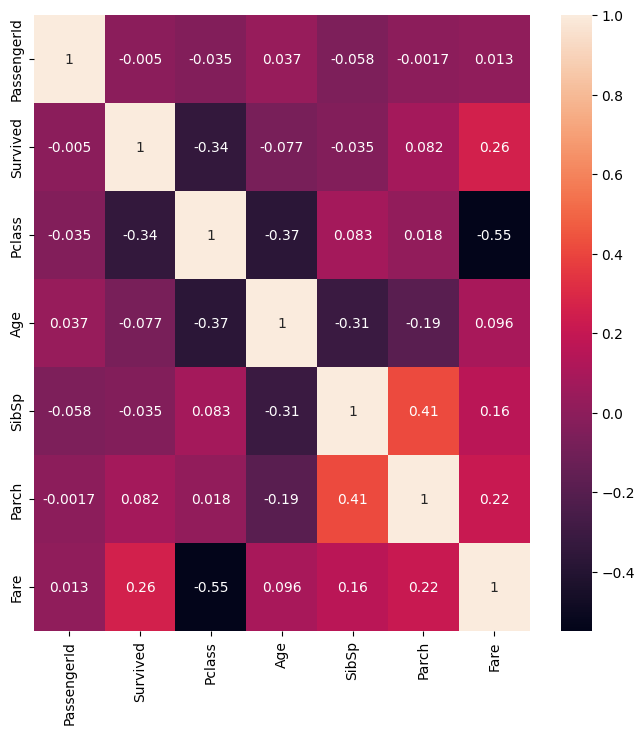

In [75]:
s = df.select_dtypes(include="number").corr()

# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(s, annot=True)

# Hasil Analisi:
# Strongest Correlation (Survived):
# 1. Pclass (-0.34): Korelasi Negatif Terkuat
# 2. Fare (+0.26): Korelasi Positif Terkuat
# 3. Age (-0.077): Korelasi Lemah.
# Multicollinearity:
# SibSp vs Parch (+0.41) -> Moderate Correlation
# PassengerId (~0.00): Ga ada korelasi dengan yang lain


In [76]:
# Missing Value Handling
for i in ["Age", "Fare"]:
    if i in df.columns:
        df[i].fillna(df[i].median(), inplace=True)

for i in ["Embarked"]:
    if i in df.columns:
        df[i].fillna(df[i].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True) # Karena lebih dari 50% missing value dan ga terlalu kepakai

/tmp/ipython-input-100573201.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
/tmp/ipython-input-100573201.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [77]:
# Outliers Handling Fare
# Selain fare outliersnya masuk akal
# Fare outliersnya dihandle pake log transformation biar ga terlalu ekstrim dan bikin skewd jadi distribusi normal

df['Fare'] = df['Fare'].map(lambda x: np.log1p(x))

In [78]:
# Encoding Categorical Variable

df.info()

# One Hot Encoding
df = pd.get_dummies(data = df, columns = ["Sex", "Embarked"], drop_first=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,True,False,True


In [79]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Survived']

X = df.drop(cols_to_drop, axis=1)
y = df['Survived']

X = X.astype(float)

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB
None


## Split Test

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model
# random_state digunakan biar hasil konsisten setiap kali di-run
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# 2. Training Model
dt_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluasi Model
print("=== Decision Tree Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

=== Decision Tree Performance ===
Accuracy: 0.74

Confusion Matrix:
 [[124  33]
 [ 37  74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       157
           1       0.69      0.67      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Training Model
rf_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi Model
print("=== Random Forest Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest Performance ===
Accuracy: 0.78

Confusion Matrix:
 [[130  27]
 [ 33  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.78      0.78       268



## Adaboost

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model
ada_model = AdaBoostClassifier(n_estimators=60, learning_rate=1.0, random_state=42)

# 2. Training
ada_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_ada = ada_model.predict(X_test)

# 4. Evaluasi
print("=== AdaBoost Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

=== AdaBoost Performance ===
Accuracy: 0.82

Confusion Matrix:
 [[141  16]
 [ 33  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



## Evaluation

1. Analisis Perbandingan
   - Decision Tree (74%): Paling rendah. Ini wajar karena satu tree aja cenderung overfitting atau underfitting.
   - Random Forest (78%): Menggabungkan banyak pohon membantu tapi karena dia bekerja secara rata-rata, dia mungkin skip pola-pola susah yang spesifik.
   - AdaBoost (82%): Paling tinggi. Karena adaboost bekerja secara serial, adaboost berhasil menemukan pola pada penumpang-penumpang yang ga kedetect randomforest sama decision tree.

2. Adaboost analysis
- Kelebihan:
    - 141 True Negative. Dari 157 orang yang meninggal, model berhasil menebak 141 dengan benar.
    - Recall untuk 0 adalah 90%. Artinya adaboost sangat mampu mengenali siapa yang ga selamat.

- Kelemahan:
    - 33 False Negative. Ada 33 orang yang sebenarnya Selamat, tapi diprediksi Meninggal.
    - Recall untuk 1 hanya 70%.Ini wajar, karena data orang meninggal lebih banyak dan polanya lebih jelas. Pola orang selamat lebih variatif.